In [281]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
data_set = pd.read_csv('COVID-tweets.csv')

In [282]:
data_set.head()

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,...,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoice™ America at http://yourvoice...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,...,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,...,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45


In [283]:
data_set.iloc[-10, 3]

'“There may be specific interactions that are consistent across the family that we could target to engineer #vaccines and #antivirals, as well as informing animal breeding programmes for #coronavirus resistance.” – Helena Maier, @Pirbright_Inst. \n\nhttps://t.co/1f0x6VEbKW'

In [284]:
data_set.tail()

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
60155,"""1204309839004012544""",https://twitter.com/RevistaArgos/status/120430...,10 Dec 2019 08:00:15,El #coronavirus entérico felino es un virus in...,Tweet,Hootsuite Inc.,0,0,NaN,NaN,...,"""588410190""",Revista Argos,RevistaArgos,La revista de los veterinarios de animales de ...,Non-Verified,https://twitter.com/RevistaArgos,Non-Protected,4236,313,23 May 2012 14:30:12
60156,"""1204212528810729479""",https://twitter.com/RobNotRob11/status/1204212...,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!...",ReTweet,Twitter for Android,0,0,NaN,NaN,...,"""4719933867""",Serving Suggestion,RobNotRob11,"6-and-a-half-foot tall, awkwardly shaped man. ...",Non-Verified,https://twitter.com/RobNotRob11,Non-Protected,37,259,06 Jan 2016 01:12:42
60157,"""1204206609708331009""",https://twitter.com/timhquotes/status/12042066...,10 Dec 2019 01:10:03,"It's my party, you're invited!\n\nPS, this is ...",Tweet,Twitter for Android,2,28,"Jackson Hole, WY",NaN,...,"""2195288012""",Tim Heidecker Quotes,timhquotes,Quotes from our favorite weird boy. Awesome pa...,Non-Verified,https://twitter.com/timhquotes,Non-Protected,2583,822,15 Nov 2013 03:20:11
60158,"""1201998948950577152""",https://twitter.com/Baric_Lab/status/120199894...,03 Dec 2019 22:57:36,Amy’s a survivor! #bariclab #pnnl #movingon #c...,Tweet,Twitter for iPhone,1,17,"Chapel Hill, NC",NaN,...,"""989521438825746433""",Baric Laboratory,Baric_Lab,"Researching SARS-CoV, MERS CoV, Dengue, Zika a...",Non-Verified,https://twitter.com/Baric_Lab,Non-Protected,1326,82,26 Apr 2018 15:07:50
60159,"""1200977067266990080""",https://twitter.com/thelonevirologi/status/120...,01 Dec 2019 03:17:00,A review of asymptomatic and sub-clinical Midd...,Tweet,Twitter for iPhone,0,0,USA,NaN,...,"""2414645220""",thelonevirologist,thelonevirologi,"Virologist.Likes history, hiking &amp; a good ...",Non-Verified,https://twitter.com/thelonevirologi,Non-Protected,6527,1233,27 Mar 2014 16:58:36


In [285]:
data_set.drop(['Client','Retweets Received', 'Likes Received', 'Tweet URL','Tweet Location'], inplace = True, axis = 1)

In [286]:
data_set2 = data_set[['Tweet Posted Time (UTC)', 'Tweet Content']]

In [287]:
data_set2

,Tweet Posted Time (UTC),Tweet Content
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...
1,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...
2,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron..."
3,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ..."
4,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...
...,...,...
60155,10 Dec 2019 08:00:15,El #coronavirus entérico felino es un virus in...
60156,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!..."
60157,10 Dec 2019 01:10:03,"It's my party, you're invited!\n\nPS, this is ..."
60158,03 Dec 2019 22:57:36,Amy’s a survivor! #bariclab #pnnl #movingon #c...


In [288]:
data_set2.iloc[:,1]

0        Also the entire Swiss Football League is on ho...
1        World Health Org Official: Trump’s press confe...
2        I mean, Liberals are cheer-leading this #Coron...
3        Under repeated questioning, Pompeo refuses to ...
4        #coronavirus comments now from @larry_kudlow h...
                               ...                        
60155    El #coronavirus entérico felino es un virus in...
60156    RT @timhquotes: It's my party, you're invited!...
60157    It's my party, you're invited!\n\nPS, this is ...
60158    Amy’s a survivor! #bariclab #pnnl #movingon #c...
60159    A review of asymptomatic and sub-clinical Midd...
Name: Tweet Content, Length: 60160, dtype: object

In [289]:
dates = data_set2['Tweet Posted Time (UTC)']

In [290]:
count = 0
for i in dates:
    #print(i)
    #print(type(i))
    if "Feb" in i:
        #print(True)
        count+=1
data_set_feb = data_set2.iloc[:count,0:].copy()

In [291]:
data_set_feb_tweets = data_set_feb.drop(['Tweet Posted Time (UTC)'], axis = 1)

In [292]:
data_set_feb_tweets

,Tweet Content
0,Also the entire Swiss Football League is on ho...
1,World Health Org Official: Trump’s press confe...
2,"I mean, Liberals are cheer-leading this #Coron..."
3,"Under repeated questioning, Pompeo refuses to ..."
4,#coronavirus comments now from @larry_kudlow h...
...,...
17995,RT @joshuawongcf: [The outbreak has been more ...
17996,RT @larazon_es: #Coronavirus | ¿Qué es un pang...
17997,Who cares?\nWorld is ravaged by #coronavirus b...
17998,RT @EpochTimesChina: News Analysis🔎As the #Cor...


In [293]:
type(data_set_feb_tweets)

pandas.core.frame.DataFrame

In [294]:
def remove_https(res):
    y = ''
    for i in range(len(res)):
        if (str(res[i]) == 'https') | (str(res[i]) == 'co'):
            pass
        else:
            y += str(res[i])
        return y


In [295]:
x = data_set_feb_tweets['Tweet Content']
print(x)

0        Also the entire Swiss Football League is on ho...
1        World Health Org Official: Trump’s press confe...
2        I mean, Liberals are cheer-leading this #Coron...
3        Under repeated questioning, Pompeo refuses to ...
4        #coronavirus comments now from @larry_kudlow h...
                               ...                        
17995    RT @joshuawongcf: [The outbreak has been more ...
17996    RT @larazon_es: #Coronavirus | ¿Qué es un pang...
17997    Who cares?\nWorld is ravaged by #coronavirus b...
17998    RT @EpochTimesChina: News Analysis🔎As the #Cor...
17999    People in the West who have democratic governm...
Name: Tweet Content, Length: 18000, dtype: object


In [296]:
print(str(data_set_feb_tweets['Tweet Content'].head(1)))

0    Also the entire Swiss Football League is on ho...
Name: Tweet Content, dtype: object


In [297]:

print("The original string is : " +  data_set_feb_tweets.iloc[0,0]) 
res = re.findall(r'\w+', str(data_set_feb_tweets.loc[0]))
print(str(res))
data_set_feb_tweets['Clear Tweet'] = str(res[i])


The original string is : Also the entire Swiss Football League is on hold. Postponing games from the professional and amateur level... #coronavirus https://t.co/UShMuqnAVC
['Tweet', 'Content', 'Also', 'the', 'entire', 'Swiss', 'Football', 'League', 'is', 'on', 'ho', 'Name', '0', 'dtype', 'object']


TypeError: list indices must be integers or slices, not str

In [298]:
data_set_feb_tweets

,Tweet Content
0,Also the entire Swiss Football League is on ho...
1,World Health Org Official: Trump’s press confe...
2,"I mean, Liberals are cheer-leading this #Coron..."
3,"Under repeated questioning, Pompeo refuses to ..."
4,#coronavirus comments now from @larry_kudlow h...
...,...
17995,RT @joshuawongcf: [The outbreak has been more ...
17996,RT @larazon_es: #Coronavirus | ¿Qué es un pang...
17997,Who cares?\nWorld is ravaged by #coronavirus b...
17998,RT @EpochTimesChina: News Analysis🔎As the #Cor...


In [299]:
               
y = [] 
print(len(str(x[5])))
#print("The original string is : " +  x) 
res = re.findall(r'\w+', str(x[5]))
for i in range(len(res)):
    if (str(res[i]) == 'https') | (str(res[i]) == 'co'):
        pass
    else:
        y.append(str(res[i]))

print(y)

221
['Are', 'you', 'going', 'to', 'see', 'some', 'schools', 'shut', 'down', 'Probably', 'White', 'House', 'Chief', 'of', 'Staff', 'Mick', 'Mulvaney', 'warned', 'that', 'the', 'coronavirus', 'could', 'disrupt', 'U', 'S', 'schools', 'as', 'districts', 'prepare', 'their', 'emergency', 'plans', 't', 'qADzyHNG4L']


In [300]:
y

['Are',
 'you',
 'going',
 'to',
 'see',
 'some',
 'schools',
 'shut',
 'down',
 'Probably',
 'White',
 'House',
 'Chief',
 'of',
 'Staff',
 'Mick',
 'Mulvaney',
 'warned',
 'that',
 'the',
 'coronavirus',
 'could',
 'disrupt',
 'U',
 'S',
 'schools',
 'as',
 'districts',
 'prepare',
 'their',
 'emergency',
 'plans',
 't',
 'qADzyHNG4L']

In [301]:
import collections
counts_no_urls = collections.Counter(y)


In [302]:
counts_no_urls.most_common(15)

[('schools', 2),
 ('Are', 1),
 ('you', 1),
 ('going', 1),
 ('to', 1),
 ('see', 1),
 ('some', 1),
 ('shut', 1),
 ('down', 1),
 ('Probably', 1),
 ('White', 1),
 ('House', 1),
 ('Chief', 1),
 ('of', 1),
 ('Staff', 1)]

In [303]:
import re 
for i in range(len(x)):
    print(x[i])
res = re.findall(r'\w+', x)

print("The original string is : " +  x) 


print(y)

Also the entire Swiss Football League is on hold. Postponing games from the professional and amateur level... #coronavirus https://t.co/UShMuqnAVC
World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’
World Health Organization Special Adviser to the Director Dr. Ezekiel Emanuel says "I found most of what [Trump] said incoherent."
https://t.co/v4WIBW9Fld
I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.

#TDS
Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax.  https://t.co/PFESx4ePpD
#coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK
"Are you going to see some schools shut down? Probably."

White House Chief of Staff Mick Mulvaney warned that the #coronavirus could disrupt U.S. schools as districts prepare their emergency plans https://t.co/qADzyHNG4L
“Disease can emerge everywhere. Coronaviruses exist on a global basis. It’s important that we don’t asc

From #Wuhan to #Iran 🇮🇷 — infecting the press w/ #coronavirus? #crazy https://t.co/hJcah8MS3i
#MaghribMinute: Flights to and from Iran suspended

#coronavirus  @omanair @SalamAir 

https://t.co/jiG6lk47ec https://t.co/YiOxNfZH2y
New #coronavirus case in #Spain 
https://t.co/mdcGjV3TQA
Yeah, not a good look - Iran’s Deputy Health Minister Tests Positive for Coronavirus https://t.co/wg1h2zUp4K #Breaking #Iran #COVIDー19 #coronavirus
"Now with the virus, it's again another tragedy." 

Venice suspended its annual carnival as Italy battles to cope with the #coronavirus surge. Here's how people are reacting https://t.co/OaSGbRfC7W https://t.co/MmdFvSmkbT
Iran's deputy health minister has tested positive for the novel #coronavirus, Iranian news agency ILNA reported. #COVID19 #Iran https://t.co/N7hwo9trHE
As the #coronavirus continues to spread, the McCourt School is proud to support the EAPA student association as they collect funds to help families affected by the virus. You can support their

More #coronavirus cases in Iran’s Qom after two deaths
#ARYNews 
https://t.co/9C1sNluFK9
Our freighters are all operating flight numbers beginning with ‘88’, for a bit of added luck!
#QatarAirways
#ChinaQatarTogether
#coronavirus https://t.co/2n3MflaP9V
Spring ploughing is in full swing on terrace farms in Huangcaoling village in SW China’s Yunnan province. The local Hani ethnic people have also been making efforts to control the novel #coronavirus outbreak.  #agriculture #farming https://t.co/DmDrUDRkQU
Ukraine's health minister said she will spend two weeks in quarantine with evacuees from #coronavirus hit #China after protesters clashed with police and threw stones at returnees over infection fears.

#Ukraine 
https://t.co/sQkAFtM8Zl
This could mean super-spreaders during incubation period, undetected by temperature readings or showing no symptoms likely invaded Africa from China https://t.co/AlbIibQlAh 16-FEB-2020 :: #COVID19 #coronavirus #2019nCoV https://t.co/GUDAtGoXhU
Australia

#XiJinping hails solid friendship with #Pakistan amid #coronavirus outbreak https://t.co/TMxdRbiNoE
Coronavirus Outbreak In China: Saudi's Imports Fall 30 Percent https://t.co/37tNSKWWmj #Coronavirus #SaudiArabiaImports
Bad news. Iran #coronavirus. https://t.co/ipeu2vbO3U
#COVID19 COVID-19 Scare: #AirIndia Flights to #Shanghai, #HongKong Cancelled Till June 30 Due to #Coronavirus Outbreak https://t.co/O0w6m35MN4
No winter lasts forever. No spring skips its turn. We #waitforyou, Jingmen! #coronavirus #COVID19 https://t.co/pryEP3vrDy
BC has identified their sixth case of #COVID19, the ninth case in Canada. The individual recently returned from Iran, and is now recovering in isolation at home.
Chinese consumers expressed outrage toward #US #ECommerce behemoth @Amazon for selling products featuring the slogan " #Coronavirus made in China", esp during such a difficult time as China is fighting against #COVID19 that has claimed over 2,000 lives. https://t.co/S7kvzcCMKt https://t.co/30NDYeuDS

A edição do Observatório do #Coronavírus de hoje destaca declaração da #Anvisa descartando suspeita de coronavírus em navio chinês que chegouao porto de Santos. Mais de 30 mil médicos chegam à #Wuhan para intensificar combate ao coronavírus. Saiba mais: https://t.co/xZnklPo5IF https://t.co/5CmNygkKta
Emperador Naruhito canceló saludo público de cumpleaños por el #coronavirus https://t.co/o2rw3K4tac https://t.co/LClTVoIdRn
If you converted this #coronavirus chart to a rate of new infections chart (rather than the hysteria confirmed cases the MSM prefers to use), it would look very much like the first half of a bell curve...and you know what happens on a bell curve after the peak is reached. https://t.co/W6k66grP4F
Le coronavirus est en train d'exploser partout dans le monde, dans un silence assourdissant.😕 #COVID19 https://t.co/dNieeSaBIw
⚠️ÚLTIMO MINUTO⚠️
Encontré la cura del #coronavirus, esta sonrisa 😊 🤭
#laurapausini https://t.co/7ZmPQTz8cB
Mini tanks deployed to disinfect #coronavi

Patient in Wuhan's makeshift hospital records video to thank health care workers on frontline of novel #coronavirus fight https://t.co/HcRsgfw4xH
#OMS no buscará cancelar los Juegos Olímpicos Tokio 2⃣0⃣2⃣0⃣ por el #coronavirus

https://t.co/caW5FBehGY https://t.co/pyCkp6qcim
# ️ # Atualização do #coronavirus:

  - 66.887 casos em todo o mundo
 - 10.109 casos suspeitos
 - 1.523 mortes
 - 10.757 casos em situações graves e críticas
 - 7.720 casos recuperados
 - A maioria dos casos é na China
 - O primeiro caso no Egito
 - 26 países relatam casos https://t.co/Rp7CAGkhyA
Coronavirus update:
- 66,887 cases worldwide
- 10,109 suspected cases
- 1,523 fatalities
- 10,757 in serious/critical condition
- 7,720 recovered
- Most cases in China
- Today: First case in Egypt
- 26 countries reporting cases

#COVID19 https://t.co/mAgOw9SU3q
CDC testing ppl w/ "flu" for signs of #coronavirus. Tests involve anyone identified by local health officials as having "flu-like" illness. CDC working w/ 5 pub hea

RT @detresfa_: One way to touch stuff while moving around in an epidemic zone #China #Coronavirus https://t.co/EpvAYM0XRL
RT @rthk_enews: There are now more than 39,800 confirmed #coronavirus cases across #China, based on previously released figures from the government
 https://t.co/GMhIzAJ3Se
RT @TravelGov: #Gabon:  On Feb. 7, Gabon announced an expansion of its efforts to prevent the spread of novel #coronavirus.  In addition to screening travelers upon entry, the government is suspending entry of travelers coming from China until further notice.  https://t.co/jIgfkrYcw0 https://t.co/k1GetKFdtB
RT @DrMattMcCarthy: Here's what isn't being said about #coronavirus: for 15 years the United States ran a research program called PREDICT to identify &amp; stop pandemics. It was shut down in October. https://t.co/A5iuhutQU8
#NovelCoronavirus #Wuhan #Pandemic #Coronavirus White Horse Rider. UN+WHO=Serpent Seed(Bow) Crown(Corona+WHO) to Conquer... https://t.co/T38OifN5T2 via @YouTube
RT @thomas

RT @jenniferatntd: Hi-tech in an era of #Coronavirus, one of the many scenes in #China during #CoronavirusOutbreak.Police in Shaoguan, Guangdong province using drones to monitor and give orders to public. 广东韶关警察用无人机监视指挥民众 #coronaviruschina #武汉肺炎 #新冠肺炎 #全民反抗 #全民自救 https://t.co/c7d707X2lv
RT @FluTrackers: China - Wuhan: ICU Doctors Bear the Brunt as #Coronavirus Causes Rapid Deterioration https://t.co/Z75czXio3i h/t Shiloh #2019nCoV
RT @PresidenciaCuba: Aumentan en China las recuperaciones y disminuyen los contagios por #coronavirus. Se demuestra la eficacia de las medidas y se mantiene su aplicación. 
#FuerzaChina #FuerzaWuhan #Cuba🇨🇺 #China🇨🇳 https://t.co/zAXrW6M49N
RT @TRTWorldNow: Six more #coronavirus cases reported on quarantined cruise ship in Japan while all on board another cruise ship in Hong Kong have been allowed to disembark https://t.co/05qEmcBnMb
RT @Woppa1Woppa: Sai Kung.  Residents are protesting that Carrie Lam is building a quarantine center in their neighborhood.  Wel

#Coronavirus: Amazon pulls out of major tech show: Science &amp; Environment - BBC News https://t.co/gIcBti7GaX #WuhanCoronavirus

MORE w/ EcoSearch - news: https://t.co/uLu66TdRNp web: https://t.co/RXyvILvoV9
RT @news_ntd: Exclusive: #Wuhan funeral home staffer reveals real death toll of #coronavirus

Watch full video on China In Focus: https://t.co/V9ORTiV3ZE
To subscribe for more fast compelling, first-hand news from China, please click: https://t.co/KnKNSPwi9r https://t.co/jykDAElPuc
RT @DrEtiquette: People in China who are “suspected” of being infected with #coronavirus 
are being rounded up and sent to facilities with people who ARE infected with #coronavirus 
Won’t this infect more people?
https://t.co/0EWa8jC8Io
RT @SpringerNature: 新型コロナウイルス（2019-nCoV）に関する情報サイトを開設しました。Nature、Nature関連誌、Springer、BMC等のシュプリンガー・ネイチャー出版の関連文献、研究データを無料で公開しています。コンテンツは随時更新。 #coronavirus  https://t.co/4RX0vAsKGB https://t.co/GzAgNTS0o1
RT @FWAsteria: #coronavirus Diary of a girl in Wuhan. As much as it lo

https://t.co/z1i87ZIjkS
Here is an information resource from the CDC #coronavirus

2019 Novel Coronavirus (2019-nCoV) | CDC https://t.co/Wwv5QXWIQU via @CDCgov
RT @ChalecosAmarill: 📽🆘️¿De verdad es tan temible el impacto del nuevo #coronavirus?

🔥El dengue ha infectado a más personas en Latinoamérica que el coronavirus 2019-nCoV en China, pero actualmente no acapara tanta atención como el nuevo virus https://t.co/acsCOLMwtG
🇨🇳 ☣2019-nCov☣🇨🇳

Enjaulados como animales por cuarentena.

 #coronavirus.
#China https://t.co/yLVbWGVDf4
RT @MikeRiosNews: Chen Qiushi, a citizen journalist who had been doing critical reporting from #Wuhan, the epicenter of the #coronavirus outbreak, went missing on Thursday evening, just as hundreds of thousands of people in #China began demanding freedom of speech online. 

https://t.co/z1i87ZIjkS
RT @jenniferatntd: So intense! Woman's pant pulled down while police 
round up people for forced quarantine, one of the many scenes in #China during #CoronavirusOutbre

RT @jenniferatntd: Document of Luopu Community of Panyu District in Guangzhou
Main point: As there're not enough masks, thermometers, disinfectants, and other plague prevention suppliers, we strongly recommend all businesses postpone their re-opening time to no later than March 1.#Coronavirus https://t.co/e6y2LQOXBP
RT @dw_espanol: La #epidemia del mortal #coronavirus continúa haciendo estrago en #China, donde las autoridades sanitarias dan cuenta de 902 #decesos, mientras el número de #contagios ronda ya los 40.000 casos.  (jc)
https://t.co/ni8drgPJk1
RT @PresidenciaCuba: La planta chino-cubana #Changheber en #Jilin produce desde el primer día del #AñoNuevoLunar, el Interferon alpha (IFNrec) con el uso de tecnología cubana. La Comisión de Salud #China🇨🇳 ha seleccionado nuestro producto entre los utilizados en la lucha contra #coronavirus.
#Cuba🇨🇺 https://t.co/oy5FQjdvI9
RT @QTAnon1: So let me get this right

The Democrats STILL want open borders?

#coronavirus
RT @QTAnon1: So let me g

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




RT @UberCitizen: Aún es un misterio la sustancia con la cual el régimen chino fumiga, y por qué lo hace: el #Coronavirus se transmite entre personas, no está en el aire, no se propaga por picaduras de insectos. ¿Qué ocultan, además de las cifras de la epidemia? 
https://t.co/iW8MZBqJZE
RT @SueroDanielUnt: Impactante esta gente, 👏👏👏👏no se han dado por vencidos. Cada uno lucha por ayudar a la nación salir airosos con lo que le ha tocado #coronavirus  https://t.co/xqoyw8AdTc
RT @howroute: More craziness from the quarantine zone in China. #coronavirus https://t.co/QNWZGooZ8a
RT @AndyBiotech: Largest-scale study to date of 1099 confirmed cases w/ #2019nCoV #coronavirus from 552 hospitals in 31 provinces from Zhong Nanshan team

- Median age ~47yo
- Female ~42%

Outcome:
- 5% admitted to ICU
- 2.18% requiring invasive ventilation
- 1.36% died

https://t.co/SA8C9WlVKI https://t.co/ybcP59TtSD
RT @InfosFrancaises: 2019-nCoV : les autorités sanitaires annoncent la fermeture d'un troisième établ

TypeError: expected string or bytes-like object

In [ ]:
print(y)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(y)
plt.figure(figsize = (48, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [304]:
tweets = data_set[['Tweet Posted Time (UTC)', 'Tweet Content']]

In [305]:
tweets.loc[0:7]

,Tweet Posted Time (UTC),Tweet Content
0,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...
1,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...
2,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron..."
3,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ..."
4,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...
5,28 Feb 2020 15:43:54,"""Are you going to see some schools shut down? ..."
6,28 Feb 2020 15:43:22,“Disease can emerge everywhere. Coronaviruses ...
7,28 Feb 2020 15:43:08,"“When the virus hit, I felt that I should stay..."


In [306]:
data_set_feb_tweets = data_set2.iloc[:count,1].copy()

In [307]:
data_set_feb_tweets[0]
len(data_set_feb_tweets)

18000

In [308]:
x = ''
for i in range(100):
    x = x + " " +data_set_feb_tweets[i]

In [309]:
x

' Also the entire Swiss Football League is on hold. Postponing games from the professional and amateur level... #coronavirus https://t.co/UShMuqnAVC World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’\nWorld Health Organization Special Adviser to the Director Dr. Ezekiel Emanuel says "I found most of what [Trump] said incoherent."\nhttps://t.co/v4WIBW9Fld I mean, Liberals are cheer-leading this #Coronavirus like it\'s their high school football team.\n\n#TDS Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax.  https://t.co/PFESx4ePpD #coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK "Are you going to see some schools shut down? Probably."\n\nWhite House Chief of Staff Mick Mulvaney warned that the #coronavirus could disrupt U.S. schools as districts prepare their emergency plans https://t.co/qADzyHNG4L “Disease can emerge everywhere. Coronaviruses exist on a global basis. It’s important that we 

In [310]:
print(x[:3676])

 Also the entire Swiss Football League is on hold. Postponing games from the professional and amateur level... #coronavirus https://t.co/UShMuqnAVC World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’
World Health Organization Special Adviser to the Director Dr. Ezekiel Emanuel says "I found most of what [Trump] said incoherent."
https://t.co/v4WIBW9Fld I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.

#TDS Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax.  https://t.co/PFESx4ePpD #coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK "Are you going to see some schools shut down? Probably."

White House Chief of Staff Mick Mulvaney warned that the #coronavirus could disrupt U.S. schools as districts prepare their emergency plans https://t.co/qADzyHNG4L “Disease can emerge everywhere. Coronaviruses exist on a global basis. It’s important that we don’t as

In [311]:
import re 
y = [] 
print("The original string is : " +  x) 
res = re.findall(r'\w+', x)
for i in range(len(res)):
    if (str(res[i]) == 'https') | (str(res[i]) == 'co'):
        pass
    else:
        y.append(str(res[i]))

The original string is :  Also the entire Swiss Football League is on hold. Postponing games from the professional and amateur level... #coronavirus https://t.co/UShMuqnAVC World Health Org Official: Trump’s press conference on #coronavirus ‘incoherent’
World Health Organization Special Adviser to the Director Dr. Ezekiel Emanuel says "I found most of what [Trump] said incoherent."
https://t.co/v4WIBW9Fld I mean, Liberals are cheer-leading this #Coronavirus like it's their high school football team.

#TDS Under repeated questioning, Pompeo refuses to say the #COVID19 coronavirus is not a hoax.  https://t.co/PFESx4ePpD #coronavirus comments now from @larry_kudlow here. https://t.co/l45e8bUmBK "Are you going to see some schools shut down? Probably."

White House Chief of Staff Mick Mulvaney warned that the #coronavirus could disrupt U.S. schools as districts prepare their emergency plans https://t.co/qADzyHNG4L “Disease can emerge everywhere. Coronaviruses exist on a global basis. It’s i

In [312]:
y

['Also',
 'the',
 'entire',
 'Swiss',
 'Football',
 'League',
 'is',
 'on',
 'hold',
 'Postponing',
 'games',
 'from',
 'the',
 'professional',
 'and',
 'amateur',
 'level',
 'coronavirus',
 't',
 'UShMuqnAVC',
 'World',
 'Health',
 'Org',
 'Official',
 'Trump',
 's',
 'press',
 'conference',
 'on',
 'coronavirus',
 'incoherent',
 'World',
 'Health',
 'Organization',
 'Special',
 'Adviser',
 'to',
 'the',
 'Director',
 'Dr',
 'Ezekiel',
 'Emanuel',
 'says',
 'I',
 'found',
 'most',
 'of',
 'what',
 'Trump',
 'said',
 'incoherent',
 't',
 'v4WIBW9Fld',
 'I',
 'mean',
 'Liberals',
 'are',
 'cheer',
 'leading',
 'this',
 'Coronavirus',
 'like',
 'it',
 's',
 'their',
 'high',
 'school',
 'football',
 'team',
 'TDS',
 'Under',
 'repeated',
 'questioning',
 'Pompeo',
 'refuses',
 'to',
 'say',
 'the',
 'COVID19',
 'coronavirus',
 'is',
 'not',
 'a',
 'hoax',
 't',
 'PFESx4ePpD',
 'coronavirus',
 'comments',
 'now',
 'from',
 'larry_kudlow',
 'here',
 't',
 'l45e8bUmBK',
 'Are',
 'you',
 'go

In [313]:
y[0]

'Also'

In [314]:
t = " "
for i in range(len(y)):
    t += y[i] + ' '
print(t)

 Also the entire Swiss Football League is on hold Postponing games from the professional and amateur level coronavirus t UShMuqnAVC World Health Org Official Trump s press conference on coronavirus incoherent World Health Organization Special Adviser to the Director Dr Ezekiel Emanuel says I found most of what Trump said incoherent t v4WIBW9Fld I mean Liberals are cheer leading this Coronavirus like it s their high school football team TDS Under repeated questioning Pompeo refuses to say the COVID19 coronavirus is not a hoax t PFESx4ePpD coronavirus comments now from larry_kudlow here t l45e8bUmBK Are you going to see some schools shut down Probably White House Chief of Staff Mick Mulvaney warned that the coronavirus could disrupt U S schools as districts prepare their emergency plans t qADzyHNG4L Disease can emerge everywhere Coronaviruses exist on a global basis It s important that we don t ascribe blame to a geographic origin the languge of stigma amp blame has become an unfortunate

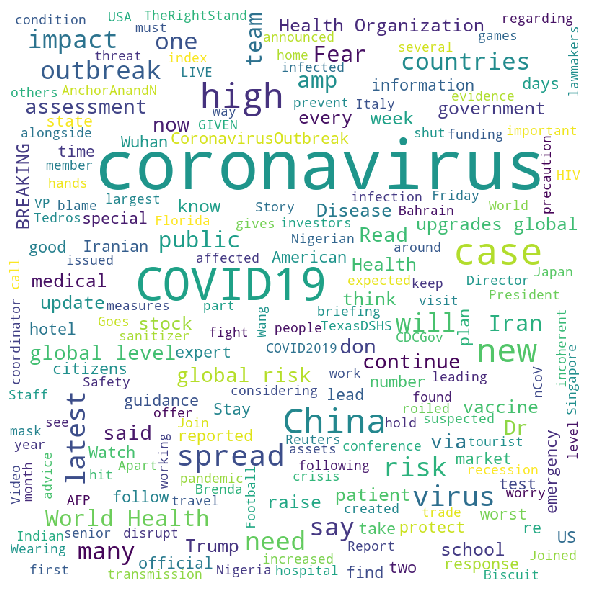

In [315]:

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(t)
plt.figure(figsize = (48, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [316]:
import collections
counts_no_urls = collections.Counter(y)

In [1]:
counts_no_urls.most_common(15)

NameError: name 'counts_no_urls' is not defined